In [1]:

# Dependencies
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
logos = nfl.import_team_desc()
logos.head()
logos = logos[['team_abbr', 'team_logo_espn']]
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
    os.makedirs("logos")

In [3]:
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])
  
data = {'Team' : team_abbr, 'Logo Path' : logo_paths}
logo_df = pd.DataFrame(data)

In [4]:
df = nfl.import_pbp_data([2023])
fumble_int = df[['posteam', 'fumble', 'interception']]
fumble_int = fumble_int.groupby('posteam').sum()
fumble_int = fumble_int.reset_index()
fumble_int = fumble_int.rename(columns={'posteam' : 'Team'})
fumble_int

2023 done.
Downcasting floats.


,Team,fumble,interception
0,ARI,8.0,3.0
1,ATL,10.0,6.0
2,BAL,14.0,3.0
3,BUF,4.0,7.0
4,CAR,8.0,4.0
5,CHI,11.0,7.0
6,CIN,2.0,4.0
7,CLE,10.0,9.0
8,DAL,5.0,4.0
9,DEN,13.0,4.0


In [5]:
df2 = pd.merge(fumble_int, logo_df)
df2

,Team,fumble,interception,Logo Path
0,ARI,8.0,3.0,logos/ARI.tif
1,ATL,10.0,6.0,logos/ATL.tif
2,BAL,14.0,3.0,logos/BAL.tif
3,BUF,4.0,7.0,logos/BUF.tif
4,CAR,8.0,4.0,logos/CAR.tif
5,CHI,11.0,7.0,logos/CHI.tif
6,CIN,2.0,4.0,logos/CIN.tif
7,CLE,10.0,9.0,logos/CLE.tif
8,DAL,5.0,4.0,logos/DAL.tif
9,DEN,13.0,4.0,logos/DEN.tif


In [6]:
def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

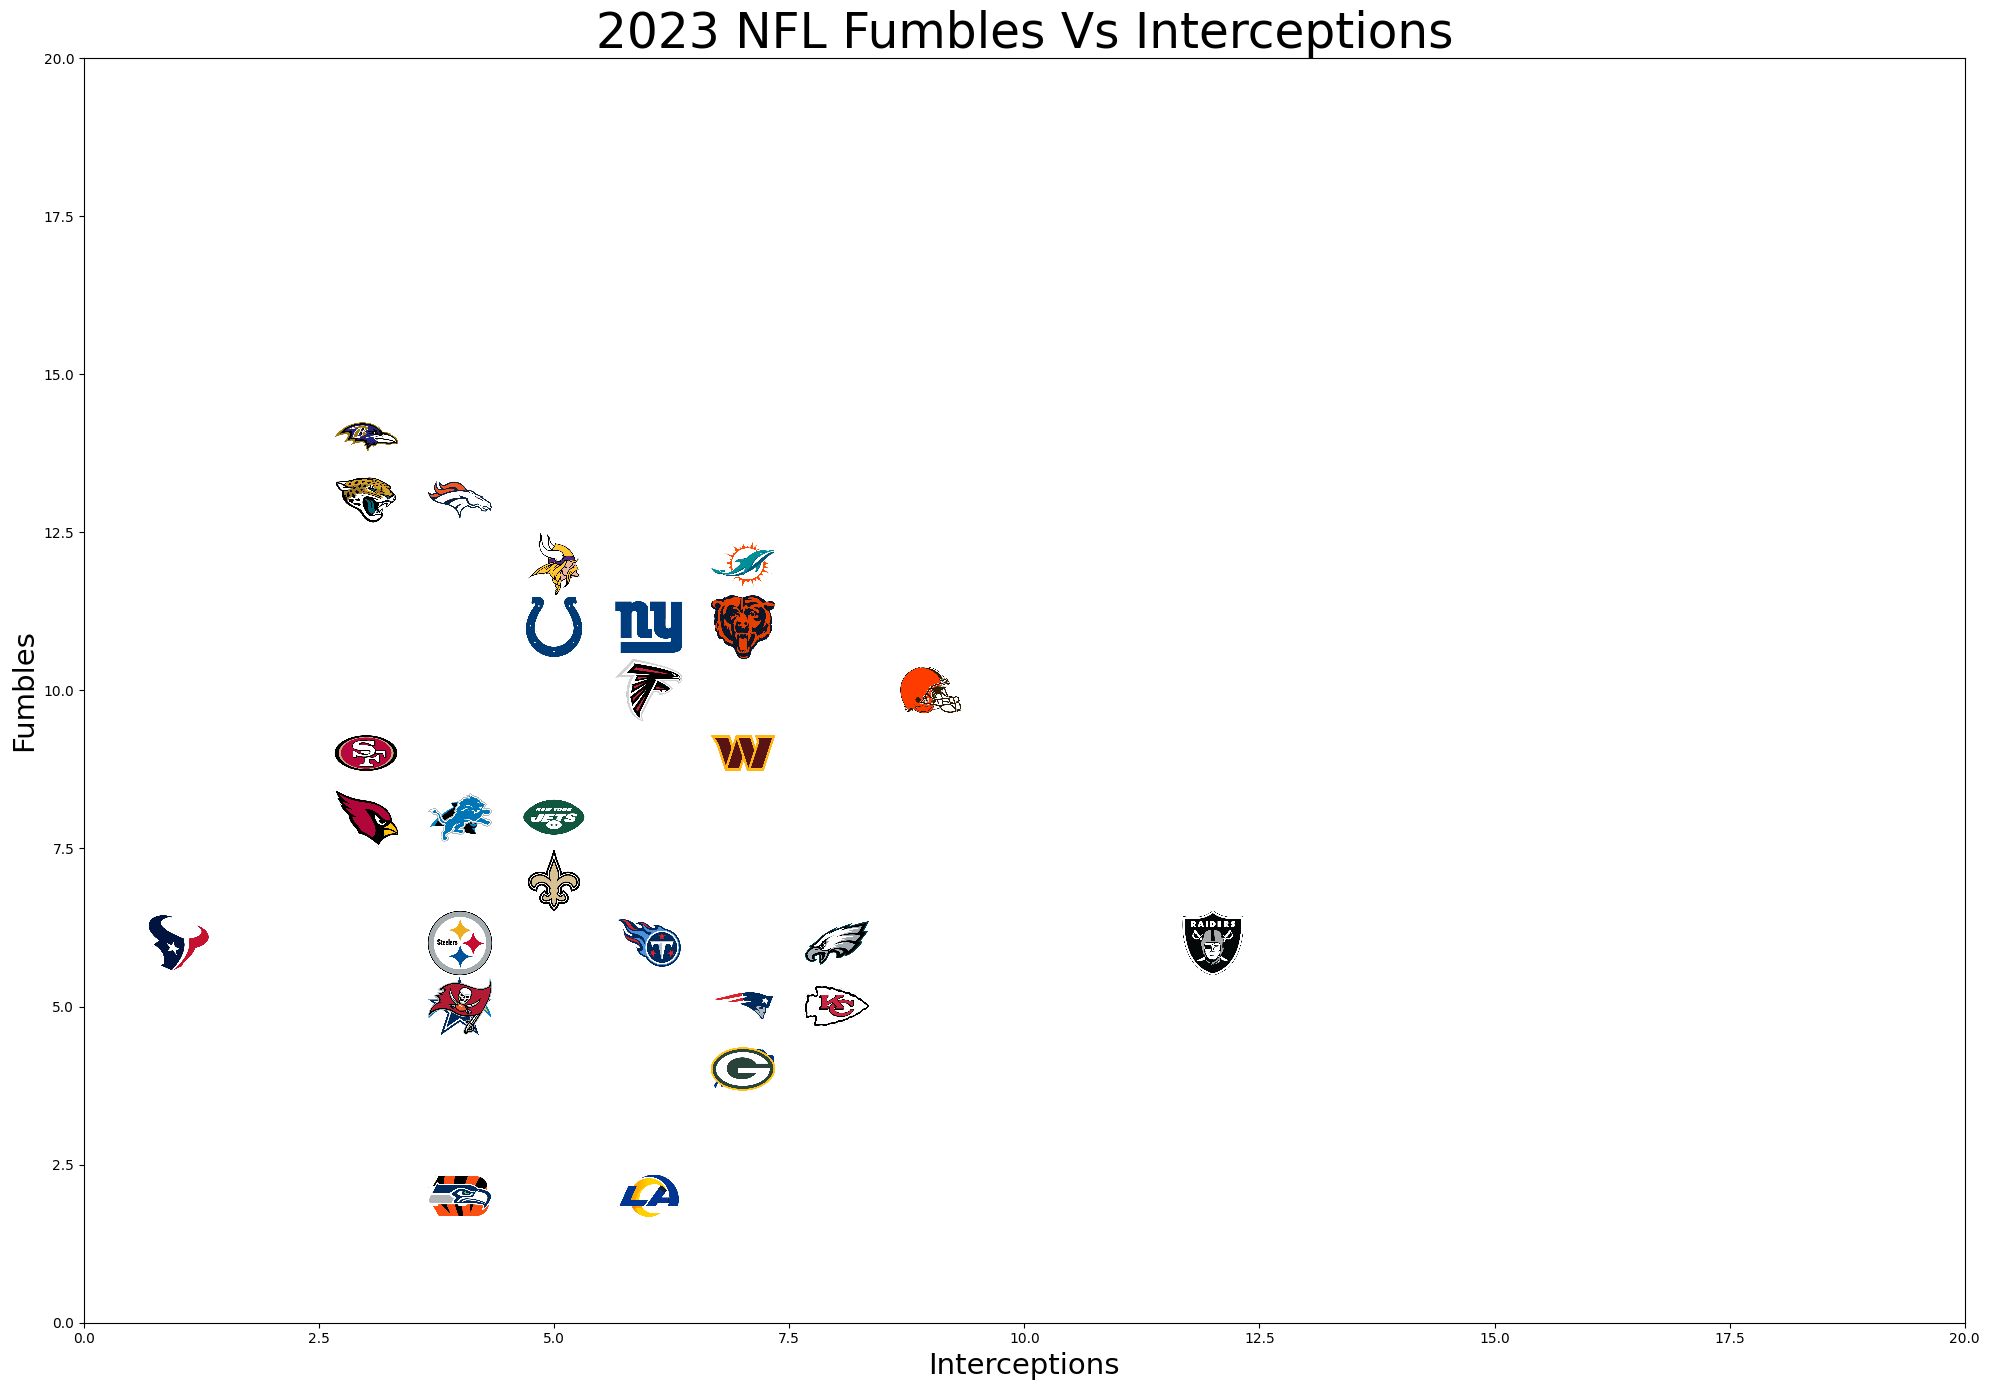

In [7]:
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

x = df2['interception']
y = df2['fumble']

paths = df2['Logo Path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title("2023 NFL Fumbles Vs Interceptions", fontdict={'fontsize':35});
plt.xlabel("Interceptions", fontdict={'fontsize':21});
plt.ylabel("Fumbles", fontdict={'fontsize':21});
plt.savefig("FumblesInt")